Trying to implement a neural network planar data classification. The neural network will have 2 hidden layers with same activation functions.


I'm using load_planar_dataset to load the data, in future it will from hugging face

[Pending] Implement back propagation and error correction

###IMPORT LIBRARIES

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.linear_model

import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(0)


Generate Data for now

In [53]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

### Get data

In [54]:
X, y = load_planar_dataset()

###Split data into training and validation

Visualize the data

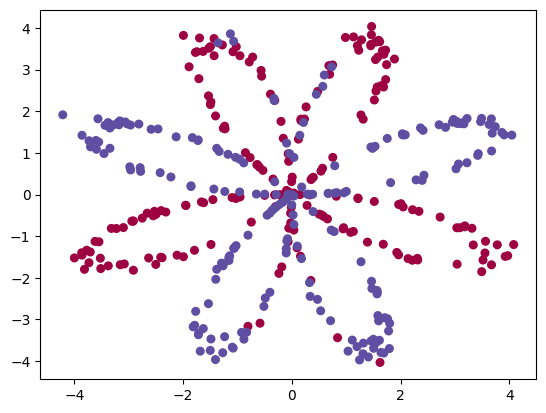

In [55]:
plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Spectral)

Implementing simple logistic regression first

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 47 % (percentage of correctly labelled datapoints)


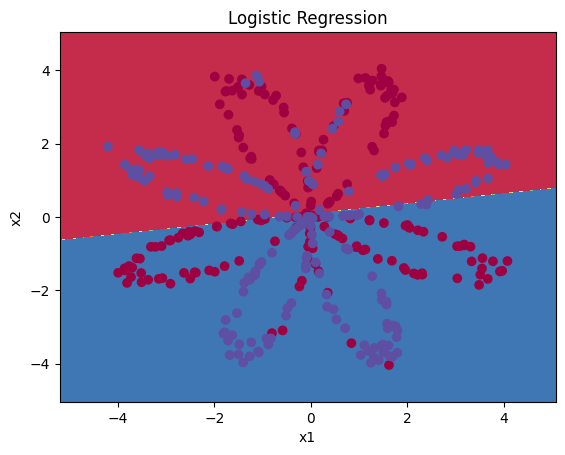

In [56]:
my_model = sklearn.linear_model.LogisticRegressionCV()
my_model.fit(X.T, y.T)

plot_decision_boundary(lambda x: my_model.predict(x), X, y)
plt.title("Logistic Regression")

preds = my_model.predict(X.T)
print ('Accuracy: %d ' % float((np.dot(y,preds) + np.dot(1-y,1-preds))/float(y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

We got shit results, lets use neural network instead

In [57]:
def layer_sizes(X, y):
  n_x = X.shape[0]
  n_h1 = 4
  n_h2 = 4
  n_y = y.shape[0]
  return (n_x, n_h1, n_h2, n_y)

def initialize_parameters(n_x, n_h1, n_h2, n_y):
  np.random.seed(1)
  W1 = np.random.randn(n_h1, n_x) * 0.01
  b1 = np.zeroes((n_h1, 1))
  W2 = np.random.randn(n_h2, n_h1) * 0.01
  b2 = np.zeroes((n_h2, 1))
  W3 = np.random.randn(n_y, n_h2) * 0.01
  b3 = np.zeroes((n_y, 1))
  return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3 }

def forward_propagation(X, parameters):
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']

  Z1 = np.dot(W1, X) + b1
  A1 = np.tanh(Z1)

  Z2 = np.dot(W1, A1) + b2
  A2 = np.tanh(Z2)

  Z3 = np.dot(W3, A2) + b3
  A3 = sigmoid(Z3)
